                                             MVA - MCMC
                                             TP2 - Importance Sampling
                                        Achari Berrada Youssef 

In [33]:
# Import the libraries : 
import numpy as np 
%matplotlib inline 
import matplotlib.pyplot as plt 
# Import chi2 distribution 
from scipy.stats import chi
# Import the Normal distribution 
from scipy.stats import norm 

# Exercice 3 : Importance sampling 

### 3.A - Poor Importance Sampling : 

We want the expectation of the function : 
$$ f(x)  = 2 \sin\left( \frac{\pi}{1.5} x \right)  \mathbb{1}_{\mathbb{R}^+ } (x) $$


### Function f : 

In [34]:
def fx(x) :
    # Function to define the function to plot
    return np.multiply(2*np.sin((np.pi * x)/1.5),x >0) 

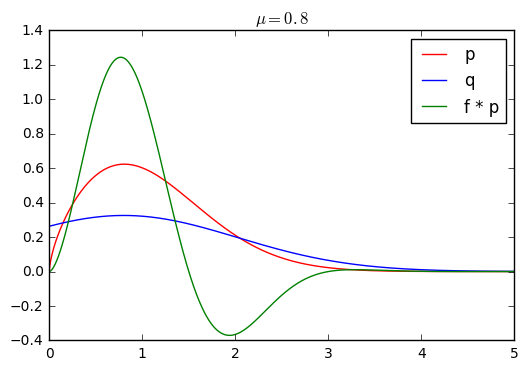

In [35]:
df = 1.65
mu = 0.8
std = np.sqrt(1.5)
x = np.linspace(0,5, 1000)
plt.plot(x, chi.pdf(x, df),'r-',label = "p")
plt.plot(x, norm.pdf(x, loc = mu,scale = std ),'b-',label = "q")
plt.plot(x,fx(x)*chi.pdf(x, df),'g-',label = "f * p")
plt.legend()
plt.title(r"$\mu = 0.8$")


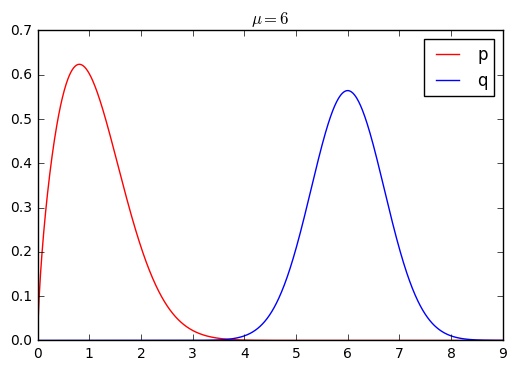

In [36]:
df = 1.65
mu = 6
std = np.sqrt(0.5)
x = np.linspace(0,9, 1000)
plt.plot(x, chi.pdf(x, df),'r-',label = "p")
plt.plot(x, norm.pdf(x, loc = mu,scale = std ),'b-',label = "q")
#plt.plot(x,fx(x)*chi.pdf(x, df),'g-',label = "f * p")
plt.legend()
plt.title(r"$\mu = 6$")


### Function to sample from p and q : 

In [37]:
## Sample from a Chi
def samplep(df,N):
    return chi.rvs(df,size = N)
## Sample from a gaussian with keeping only positive values 
def sampleq(mu,var,N): 
    l = []
    while len(l) != N : 
        x = norm.rvs(loc=mu,scale=var)
        if x > 0 : 
            l.append(x)
    return np.array(l)

### 1. Implementation of the important sampling method : 

In [38]:
def true_sampling(df, N) : 
    ## Sampling from p : Chi distribution 
    p  = samplep(df,N) 
    ## Evaluate f on p 
    f = fx(p)
    ## Evalute the weights 
    wp  = chi.pdf(p,df) 
    return np.divide(np.sum( np.multiply(f ,wp)) , N ) 

In [50]:
def important_sampling(df,mu,var,N) : 
    ## Sampling from q : normal distribution
    q  = sampleq(mu,var,N) 
    ## Evaluation of f in q 
    f  = fx(q) 
    ## Compute the weights on q : 
    wq = norm.pdf(q,loc = mu, scale = var) 
    wp = chi.pdf(q,df) 
    w  = np.divide(wp,wq) 
    ## I normalize with N as I used the true probabilities :
    w_norm = np.divide(w,N)
    return  np.sum( np.multiply(f , w_norm ))

### 2. Comparison of the estimates with respect to N : 

#### Set the parameters : 

In [40]:
# Parameter of the Chi distribution 
df = 1.65 
# Parameter of the Gaussian distribution 
mu = 0.8
std = np.sqrt(1.5)
# list of the sample size 
N = [10,100,10**3,10**4,10**5]

#### True sampling with different sample size : 

In [51]:
l = [] 
for n in N: 
    l.append(true_sampling(df,n))
print l


[0.41322920127714691, 0.48997762951558327, 0.53601275231833823, 0.5322356841946122, 0.53967274294581036]


#### Important sampling with different sample size : 

In [42]:
l = [] 
for n in N: 
    l.append(important_sampling(df,mu,np.sqrt(1.5),n) /2 )
print l

[0.69454607665977197, 0.64194455727773236, 0.55421345157103108, 0.52314512477821995, 0.51736142066785551]


We converge with important sampling to the true estimate.

#### 3. With shifted mean 

In [48]:
# Update of the parameter of the Gaussian distribution 
mu = 6
std = np.sqrt(0.5)

In [49]:
l = [] 
for n in N: 
    l.append(important_sampling(df,mu,std,n) /2 )
print l

[-2.6942207065158731e-05, 3.127669595481433e-05, 0.010787366723203991, 0.0023308467978117565, 0.0038807259904314537]


When the centers of mass for each distribution are far apart, we do not converge to the true expectation with important sampling 

#### Please note : 
In order to obtain the convergence to the true estimate with important sampling, I had to  divide by two the estimated value of the important sampling. I coudn't find why in my algorithm .. I will try to find why. Any help is welcome :) 